In [1]:
import h5py

In [3]:
fin = h5py.File('charts.h5', 'r')

In [6]:
fin.keys()

<KeysViewHDF5 ['bar']>

In [7]:
fin.close()

In [8]:
from cv_utils import _resize

In [9]:
bar = _resize('training/images/bar')
scatter = _resize('training/images/scatter')

In [14]:
import matplotlib.pyplot as plt

In [16]:
bar.shape

(52, 224, 224, 3)

In [17]:
scatter.shape

(48, 224, 224, 3)

In [19]:
y = np.zeros((100,))
y[:52] = 1

In [21]:
from tensorflow.keras.utils import to_categorical

In [22]:
y = to_categorical(y)

In [24]:
X = np.r_[bar, scatter]

In [25]:
X.shape

(100, 224, 224, 3)

In [26]:
y.shape

(100, 2)

In [27]:
from tensorflow.keras.applications import VGG16
model = VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

In [28]:
from tensorflow.keras import layers

In [32]:
def plot_model(history):
    fig, ax = plt.subplots()
    for k, v in history.history.items():
        ax.plot(v, label=k)
    plt.legend()

[<tf.Variable 'kernel:0' shape=(4, 3) dtype=float32, numpy=
 array([[ 0.5429089 ,  0.3614682 ,  0.6501814 ],
        [ 0.80561435,  0.5934254 ,  0.26255226],
        [-0.2346654 ,  0.5895897 ,  0.2376399 ],
        [-0.61419404, -0.8271248 , -0.51567423]], dtype=float32)>,
 <tf.Variable 'bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]

In [33]:
model.trainable = False

In [72]:
from tensorflow.keras.losses import CategoricalCrossentropy

In [80]:
ip_layer = layers.Input(shape=(224, 224, 3))
x = model(ip_layer, training=False)
x = layers.Dense(2)(x)
outer = Model(ip_layer, x)

outer.compile(optimizer=Adam(lr=0.05),
              loss=CategoricalCrossentropy(from_logits=True), metrics=['categorical_accuracy'])

In [42]:
from tensorflow.keras import Model

In [44]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import *

In [48]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, stratify=np.argmax(y, axis=1))

In [52]:
ytest.shape

(33, 2)

In [81]:
history = outer.fit(xtrain, ytrain, validation_data=(xtest, ytest), batch_size=16, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 96ms/step - loss: 0.6998 - categorical_accuracy: 0.4478 - val_loss: 0.6796 - val_categorical_accuracy: 0.7273
Epoch 2/100
5/5 [==============================] - 0s 59ms/step - loss: 0.6723 - categorical_accuracy: 0.6716 - val_loss: 0.6683 - val_categorical_accuracy: 0.5152
Epoch 3/100
5/5 [==============================] - 0s 58ms/step - loss: 0.6776 - categorical_accuracy: 0.5224 - val_loss: 0.6613 - val_categorical_accuracy: 0.5152
Epoch 4/100
5/5 [==============================] - 0s 59ms/step - loss: 0.6595 - categorical_accuracy: 0.5522 - val_loss: 0.6373 - val_categorical_accuracy: 0.7879
Epoch 5/100
5/5 [==============================] - 0s 65ms/step - loss: 0.6415 - categorical_accuracy: 0.7761 - val_loss: 0.6273 - val_categorical_accuracy: 0.8485
Epoch 6/100
5/5 [==============================] - 0s 59ms/step - loss: 0.6389 - categorical_accuracy: 0.8060 - val_loss: 0.6163 - val_categorical_accuracy: 0.7576
Epoch 7/100
5/5 

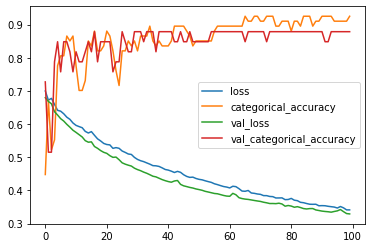

In [82]:
plot_model(history)

In [70]:
max(history.history['val_categorical_accuracy'])

0.5454545617103577

In [84]:
outer.save('bar_vs_scatter.h5')

In [85]:
testX = _resize('training/images/testing')

In [90]:
p = outer.predict(testX)

In [92]:
p = p.argmax(axis=1)

In [93]:
p

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [97]:
ONE = testX[p.astype(bool)]
TWO = testX[np.logical_not(p.astype(bool))]

In [98]:
ONE.shape

(14, 224, 224, 3)

In [99]:
TWO.shape

(9, 224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


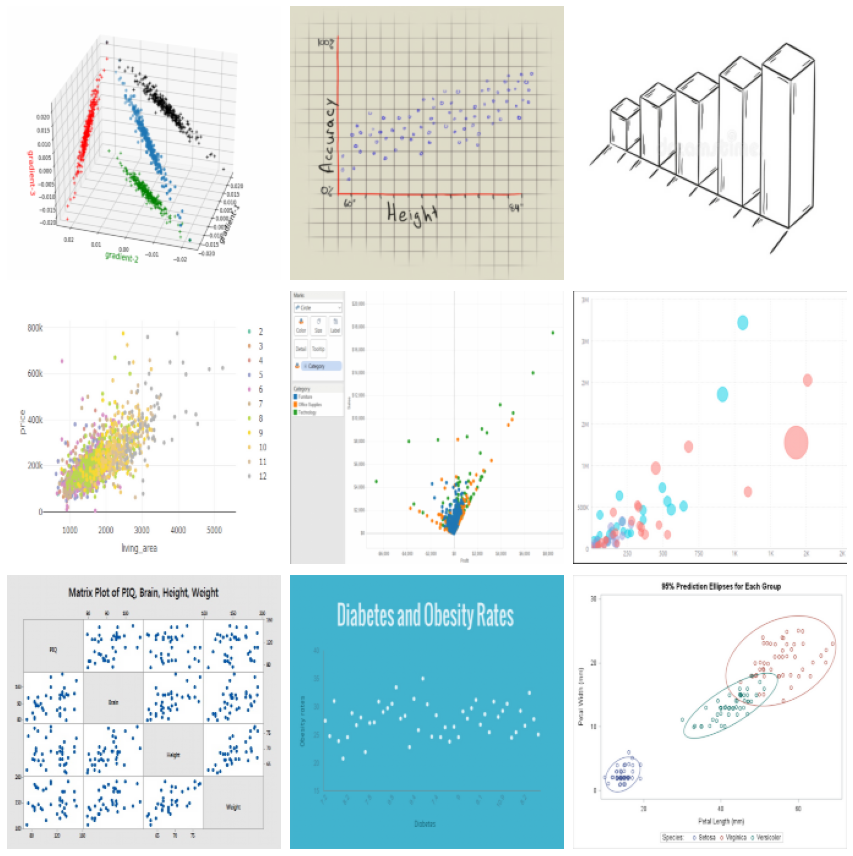

In [102]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
for i in range(3):
    for j in range(3):
        ix = i * 3 + j
        ax[i, j].imshow(TWO[ix])
        ax[i, j].axis('off')
plt.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


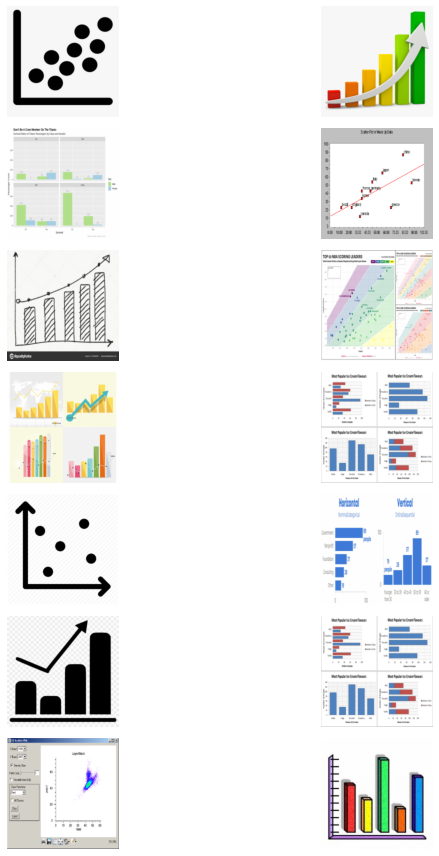

In [103]:
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(12, 12))
for i in range(7):
    for j in range(2):
        ix = i * 2 + j
        ax[i, j].imshow(ONE[ix])
        ax[i, j].axis('off')
plt.tight_layout()

# With 4 classes

In [104]:
treemap = _resize('training/images/treemap')

In [105]:
choropleth = _resize('training/images/choropleth')

In [106]:
treemap.shape

(46, 224, 224, 3)

In [107]:
choropleth.shape

(47, 224, 224, 3)

In [108]:
bar.shape

(52, 224, 224, 3)

In [109]:
scatter.shape

(48, 224, 224, 3)

In [110]:
y = np.r_[np.zeros((bar.shape[0],)), np.ones((scatter.shape[0],)), np.ones((treemap.shape[0],)) * 2, np.ones((choropleth.shape[0],)) * 3]

In [112]:
X = np.r_[bar, scatter, treemap, choropleth]

In [116]:
y = to_categorical(y)

In [117]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, stratify=np.argmax(y, axis=1))

In [120]:
ip_layer = layers.Input(shape=(224, 224, 3))
x = model(ip_layer, training=False)
x = layers.Dense(4)(x)
outer = Model(ip_layer, x)

outer.compile(optimizer=Adam(lr=0.05),
              loss=CategoricalCrossentropy(from_logits=True), metrics=['categorical_accuracy'])

In [121]:
history = outer.fit(xtrain, ytrain, validation_data=(xtest, ytest), batch_size=16, epochs=1000)

Epoch 1/1000
9/9 [==============================] - 1s 81ms/step - loss: 1.3817 - categorical_accuracy: 0.2326 - val_loss: 1.3502 - val_categorical_accuracy: 0.3594
Epoch 2/1000
9/9 [==============================] - 1s 62ms/step - loss: 1.3366 - categorical_accuracy: 0.4341 - val_loss: 1.3236 - val_categorical_accuracy: 0.3594
Epoch 3/1000
9/9 [==============================] - 1s 65ms/step - loss: 1.3098 - categorical_accuracy: 0.4419 - val_loss: 1.3025 - val_categorical_accuracy: 0.4531
Epoch 4/1000
9/9 [==============================] - 1s 63ms/step - loss: 1.2783 - categorical_accuracy: 0.4884 - val_loss: 1.2747 - val_categorical_accuracy: 0.5625
Epoch 5/1000
9/9 [==============================] - 1s 63ms/step - loss: 1.2429 - categorical_accuracy: 0.6589 - val_loss: 1.2506 - val_categorical_accuracy: 0.5938
Epoch 6/1000
9/9 [==============================] - 1s 65ms/step - loss: 1.2091 - categorical_accuracy: 0.6899 - val_loss: 1.2291 - val_categorical_accuracy: 0.4844
Epoch 7/10

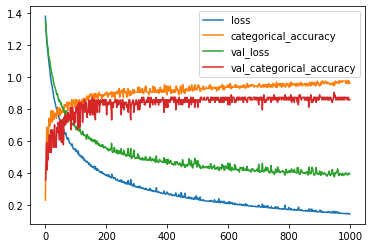

In [122]:
plot_model(history)

In [123]:
testX = _resize('training/images/testing')

In [124]:
testX.shape

(53, 224, 224, 3)

In [125]:
p = outer.predict(testX)

In [126]:
p = p.argmax(axis=1)

In [128]:
import pandas as pd
pd.Series(p).value_counts()

0    17
3    14
2    14
1     8
dtype: int64

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


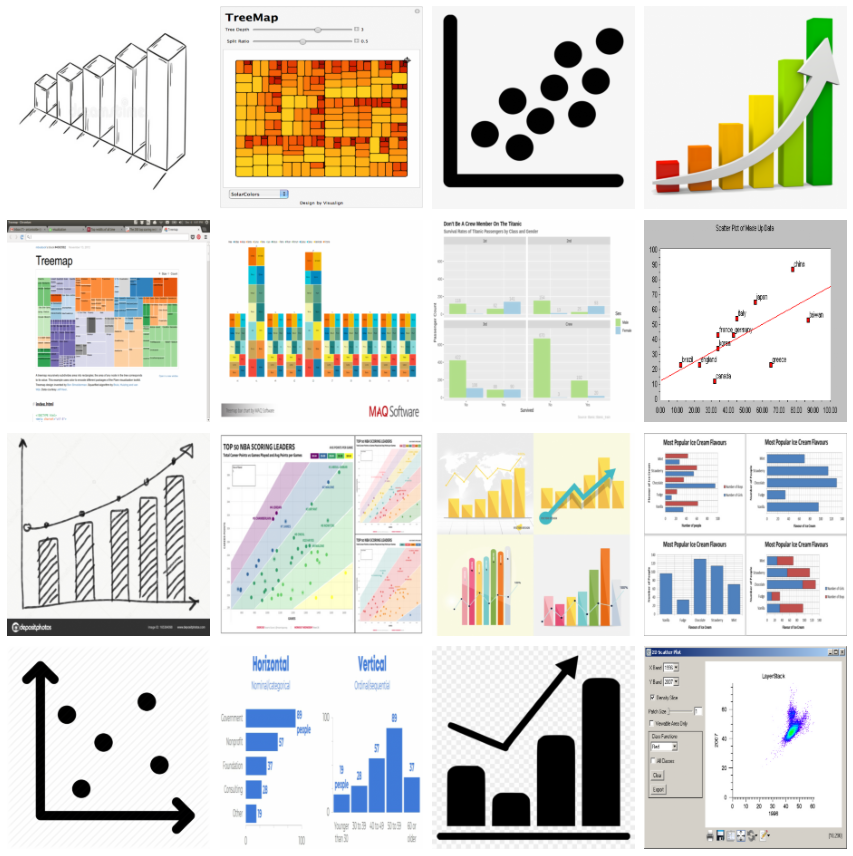

In [129]:
ZERO = testX[p == 0]
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))
for i in range(4):
    for j in range(4):
        ix = i * 4 + j
        ax[i, j].imshow(ZERO[ix])
        ax[i, j].axis('off')
plt.tight_layout()

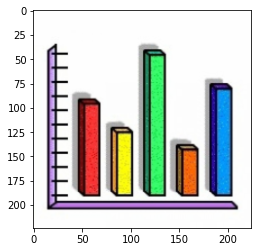

In [130]:
plt.imshow(ZERO[-1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


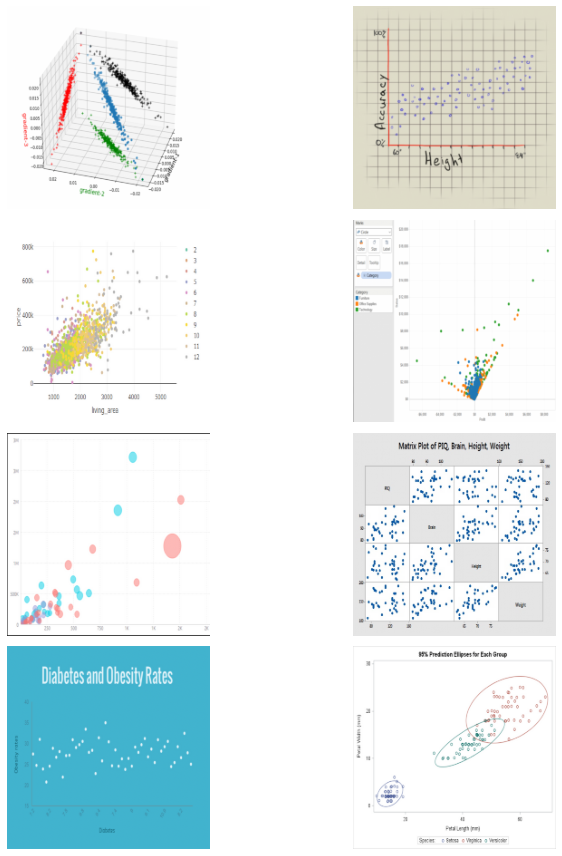

In [132]:
ONE = testX[p == 1]
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))
for i in range(4):
    for j in range(2):
        ix = i * 2 + j
        ax[i, j].imshow(ONE[ix])
        ax[i, j].axis('off')
plt.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


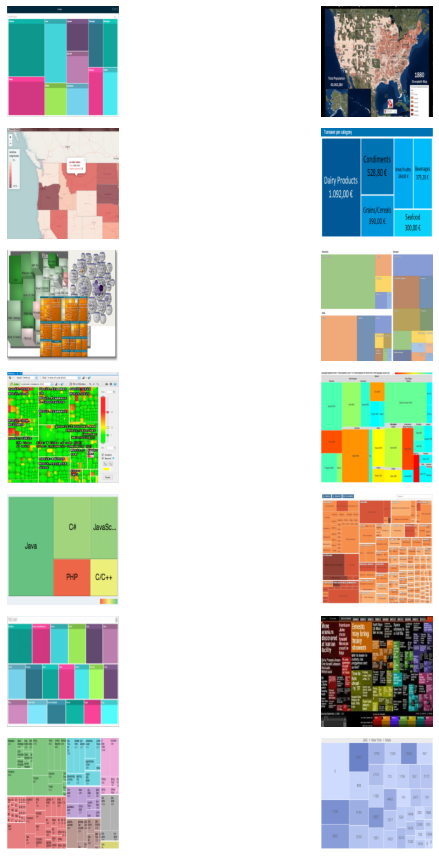

In [133]:
TWO = testX[p == 2]
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(12, 12))
for i in range(7):
    for j in range(2):
        ix = i * 2 + j
        ax[i, j].imshow(TWO[ix])
        ax[i, j].axis('off')
plt.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


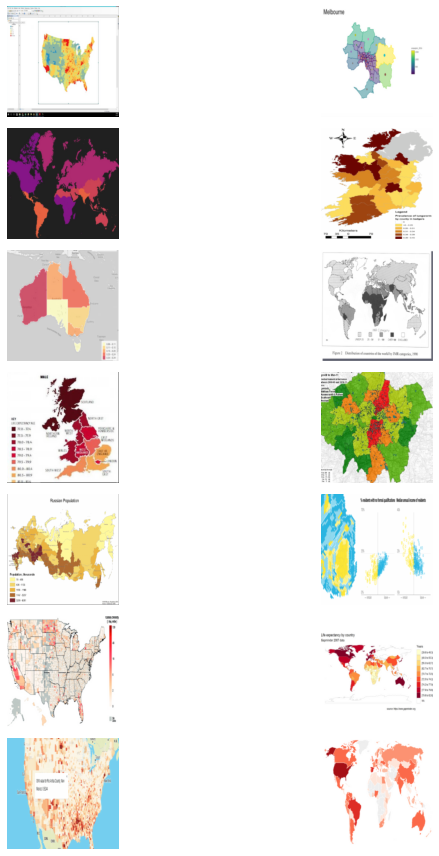

In [134]:
THREE = testX[p == 3]
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(12, 12))
for i in range(7):
    for j in range(2):
        ix = i * 2 + j
        ax[i, j].imshow(THREE[ix])
        ax[i, j].axis('off')
plt.tight_layout()

In [135]:
outer.save('four-class.h5')